# Boston Housing Price Prediction

| **Code** | **Description** |
| --- | --- |
| **CRIM** | per capita crime rate by town |
| **ZN** | proportion of residential land zoned for lots over 25,000 sq.ft. |
| **INDUS** | proportion of non-retail business acres per town |
| **CHAS** | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) |
| **NOX** | nitric oxides concentration (parts per 10 million) |
| **RM** | average number of rooms per dwelling |
| **AGE** | proportion of owner-occupied units built prior to 1940 |
| **DIS** | weighted distances to five Boston employment centres |
| **RAD** | index of accessibility to radial highways |
| **TAX** | full-value property-tax rate per "$10,000" |
| **PTRATIO** | pupil-teacher ratio by town |
| **B** | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town |
| **LSTAT** | lower status of the population |
| **MEDV** | Median value of owner-occupied homes in $1000's |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('housing.data', delim_whitespace=True, header=None)

In [3]:
col_names=["CRIM", "ZN","INDUS", "CHAS","NOX","RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B" ,"LSTAT", "MEDV"]

In [4]:
data.columns = col_names

In [5]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


---
## Exploratory Data Analysis (EDA)

In [6]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


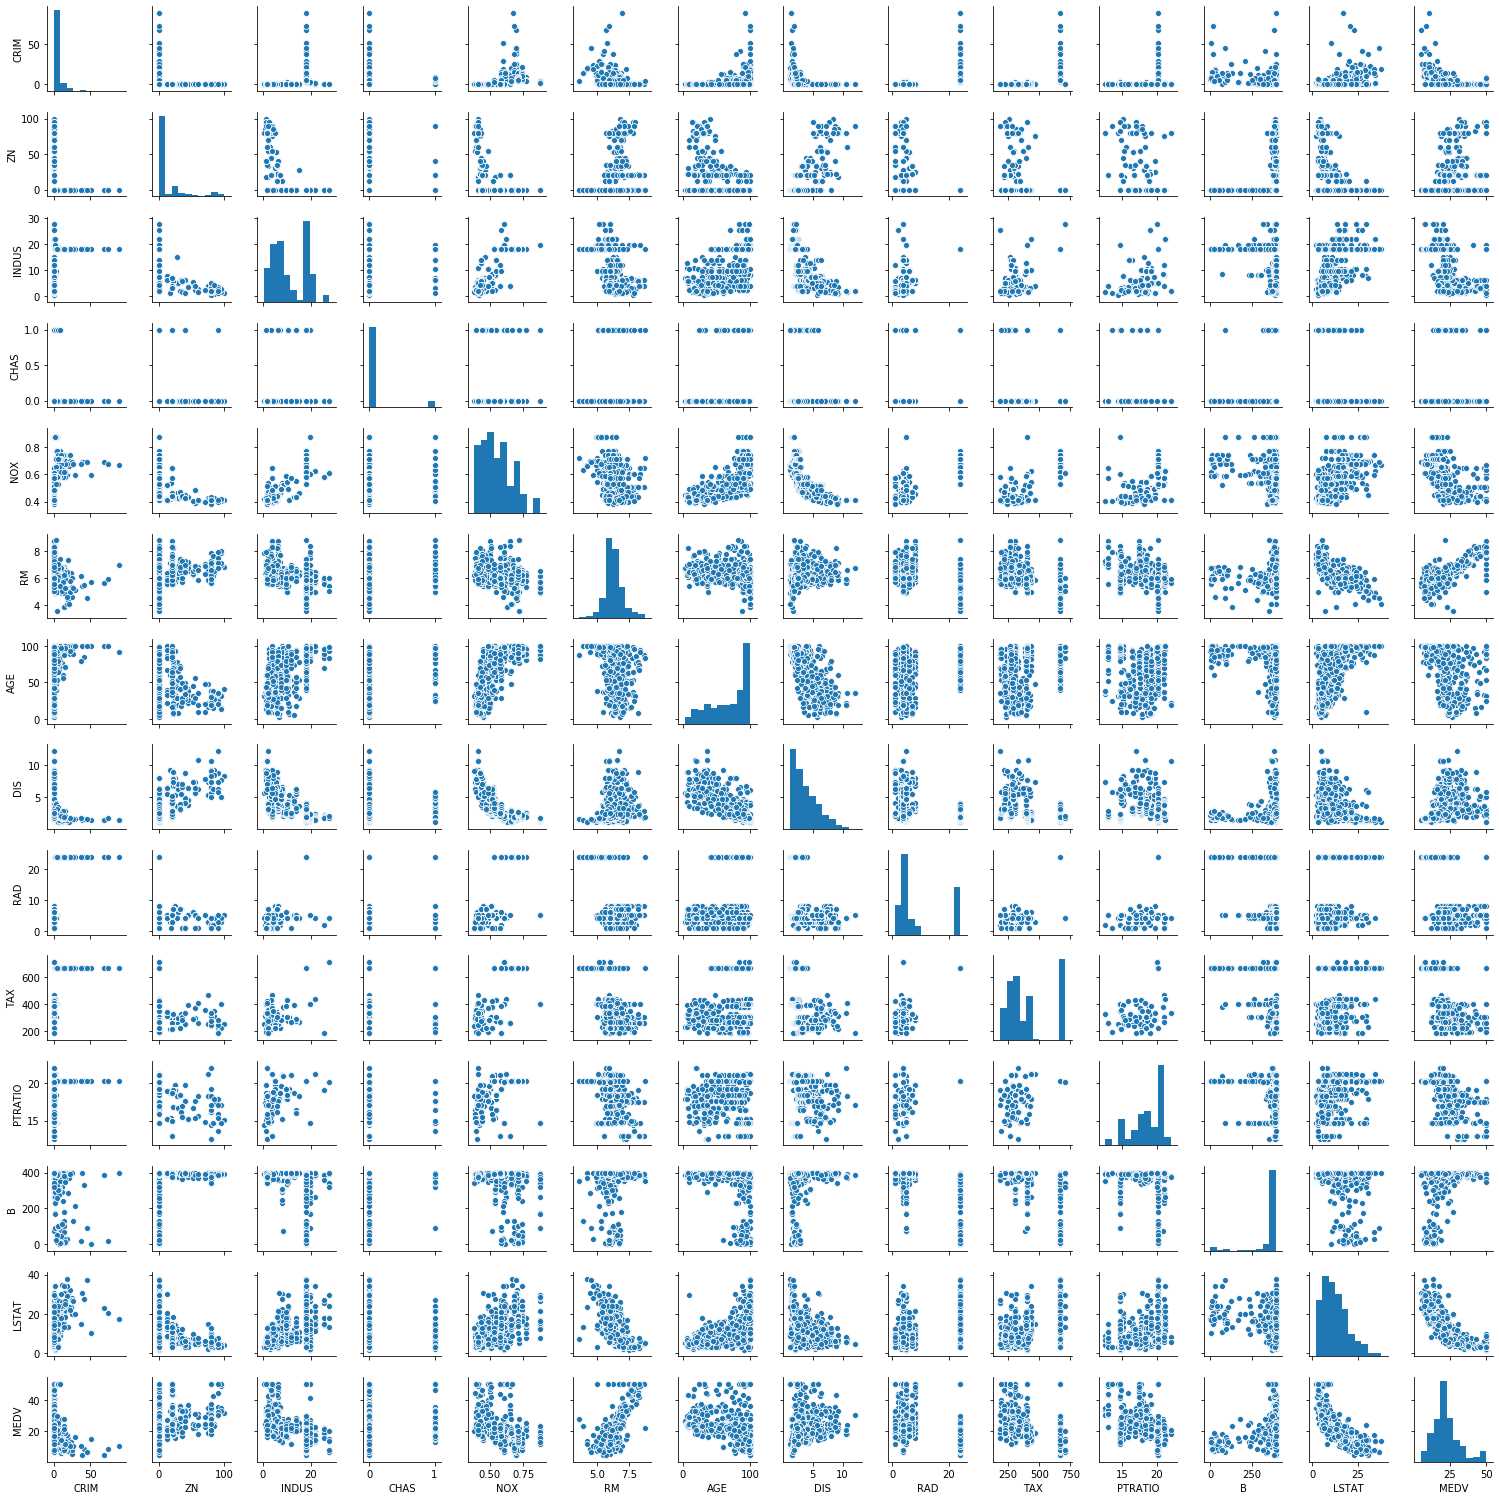

In [7]:
sns.pairplot(data, height=1.5)
plt.show()

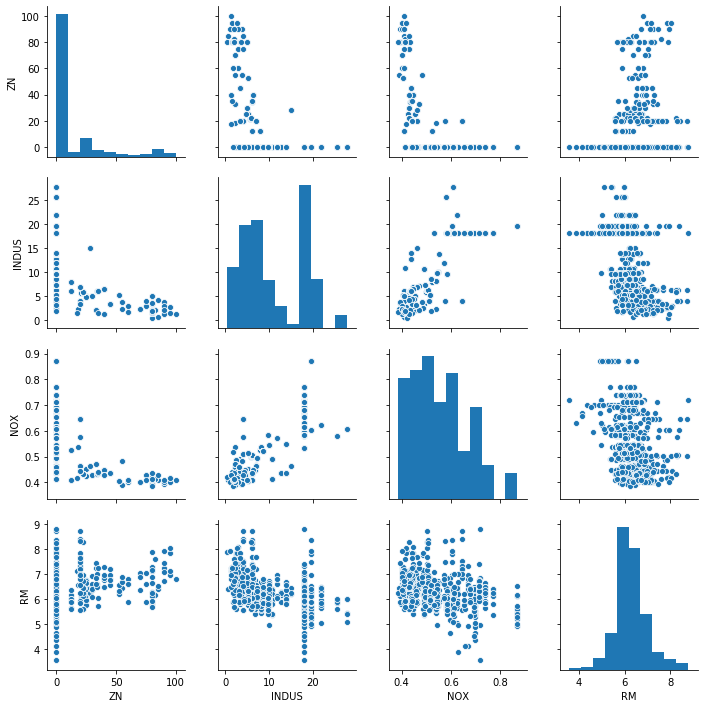

In [8]:
sns.pairplot(data[ ["ZN", "INDUS", "NOX", "RM"] ], height=2.5)
plt.show()

---
## Correlation Analysis and Feature Selection

In [9]:
pd.options.display.float_format = '{:,.3f}'.format

In [10]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


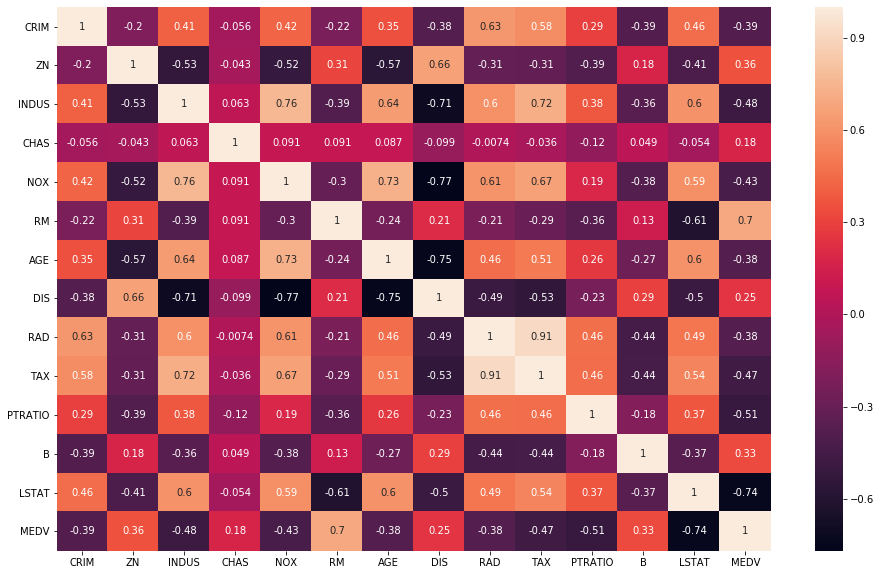

In [11]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

***
## Simple Linear Regression Modelling

In [12]:
X = data['RM'].values.reshape(-1,1)

In [13]:
y=data['MEDV'].values

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

In [16]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
model.coef_

array([9.10210898])

In [18]:
model.intercept_

-34.67062077643857

### Linear Model
$ y = 9.10210898 * X -34.6706 $

---

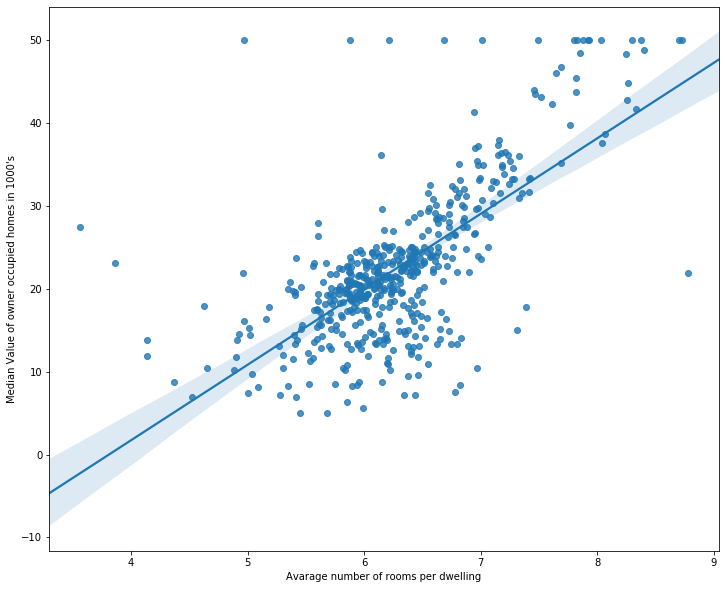

In [19]:
plt.figure(figsize=(12,10))
sns.regplot(X,y)
plt.xlabel("Avarage number of rooms per dwelling")
plt.ylabel("Median Value of owner occupied homes in 1000's")
plt.show();

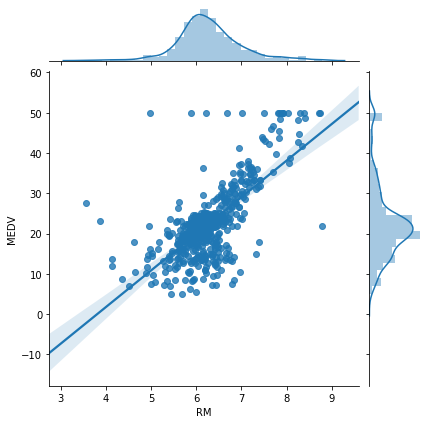

In [20]:
sns.jointplot(x='RM', y='MEDV', data=data, kind='reg')
plt.show();

---

In [21]:
X = data['LSTAT'].values.reshape(-1,1)

In [22]:
y=data['MEDV'].values

In [23]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
model.coef_

array([-0.95004935])

In [25]:
model.intercept_

34.55384087938311

### Linear Model
$ y = -0.95004935 * X +34.553 $

---

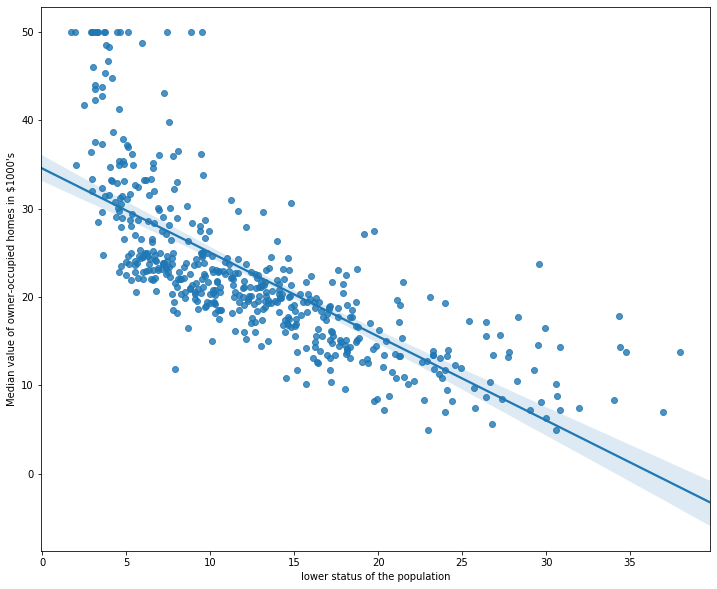

In [26]:
plt.figure(figsize=(12,10))
sns.regplot(X,y)
plt.xlabel("lower status of the population")
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show()

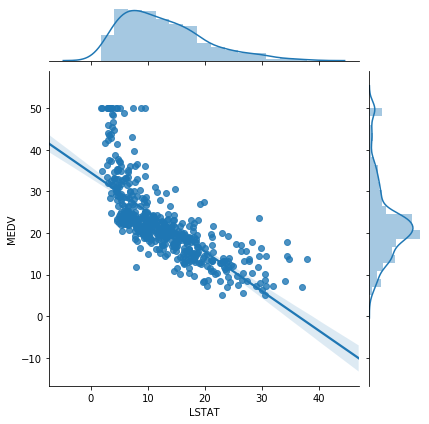

In [27]:
sns.jointplot(x='LSTAT', y='MEDV', data=data, kind='reg')

---
## Robust Regression

In [28]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.006,18.000,2.310,0,0.538,6.575,65.200,4.090,1,296.000,15.300,396.900,4.980,24.000
1,0.027,0.000,7.070,0,0.469,6.421,78.900,4.967,2,242.000,17.800,396.900,9.140,21.600
2,0.027,0.000,7.070,0,0.469,7.185,61.100,4.967,2,242.000,17.800,392.830,4.030,34.700
3,0.032,0.000,2.180,0,0.458,6.998,45.800,6.062,3,222.000,18.700,394.630,2.940,33.400
4,0.069,0.000,2.180,0,0.458,7.147,54.200,6.062,3,222.000,18.700,396.900,5.330,36.200


## RANdom SAmple Consensus (RANSAC) Algorithm

In [29]:
X = data['RM'].values.reshape(-1,1)
y = data['MEDV'].values

In [30]:
from sklearn.linear_model import RANSACRegressor

In [31]:
ransac = RANSACRegressor()

In [32]:
ransac.fit(X,y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [33]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [34]:
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X.reshape(-1,1)) 

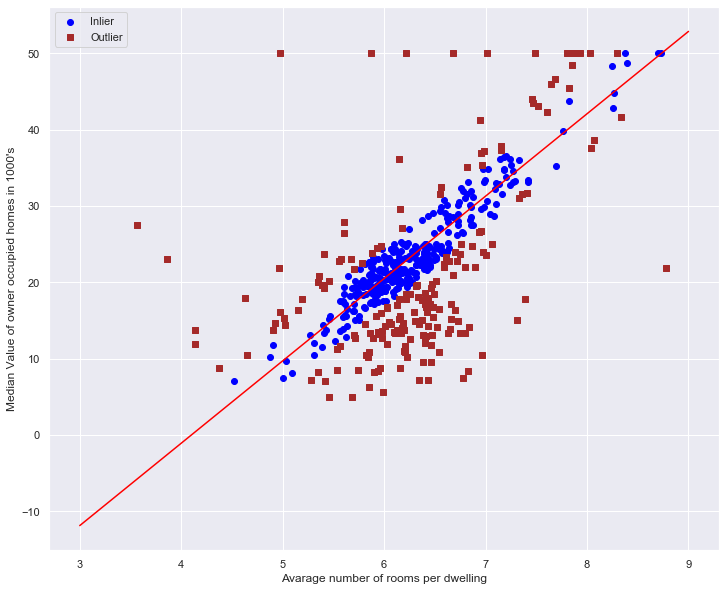

In [35]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,10))
plt.scatter(X[inlier_mask], y[inlier_mask], c='blue', marker='o', label='Inlier')
plt.scatter(X[outlier_mask], y[outlier_mask], c='brown', marker='s', label='Outlier')
plt.plot(line_X,line_y_ransac,color='red')
plt.xlabel("Avarage number of rooms per dwelling")
plt.ylabel("Median Value of owner occupied homes in 1000's")
plt.legend(loc='upper left')
plt.show()

In [36]:
ransac.estimator_.coef_

array([10.79490439])

In [37]:
ransac.estimator_.intercept_

-44.278940560741276

### RANSAC
$ y = 12.446 * X - 54.886$
### Simple Linear Regression
$ y = 9.102 * X -34.670 $

---

### RANSAC for LSTAT

In [38]:
X = data['LSTAT'].values.reshape(-1,1)
y = data['MEDV'].values
ransac.fit(X,y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X.reshape(-1,1)) 

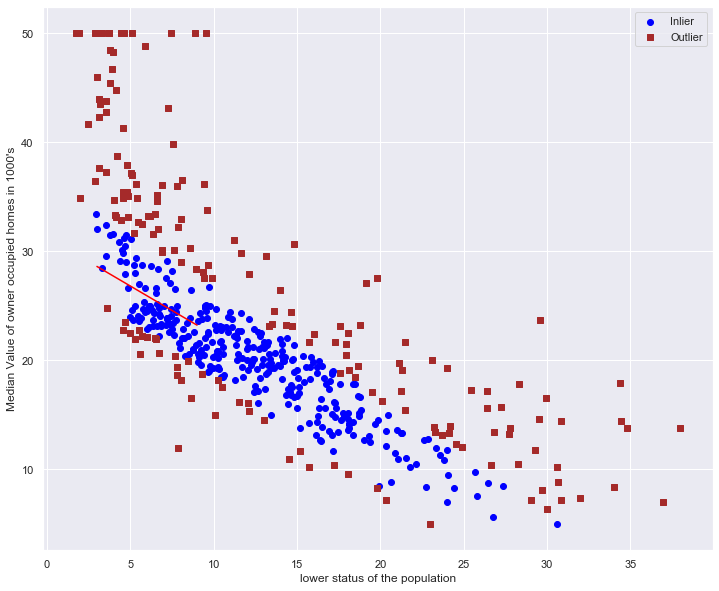

In [39]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,10))
plt.scatter(X[inlier_mask], y[inlier_mask], c='blue', marker='o', label='Inlier')
plt.scatter(X[outlier_mask], y[outlier_mask], c='brown', marker='s', label='Outlier')
plt.plot(line_X,line_y_ransac,color='red')
plt.xlabel("lower status of the population")
plt.ylabel("Median Value of owner occupied homes in 1000's")
plt.legend(loc='upper right')
plt.show()

In [40]:
ransac.estimator_.coef_

array([-0.89754525])

In [41]:
ransac.estimator_.intercept_

31.29479499495904

### RANSAC
$ y = -0.768 * X - 30.356$
### Simple Linear Regression
$ y = -0.950 * X +34.553 $

---

---
## Performance Evaluate of Regression Model 

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = data['LSTAT'].values.reshape(-1,1)
y = data['MEDV'].values

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0 )

In [45]:
lr = LinearRegression()

In [46]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
y_train_pred = lr.predict(X_train)

In [48]:
y_test_pred = lr.predict(X_test)

---

### Method 1: Residual Analysis

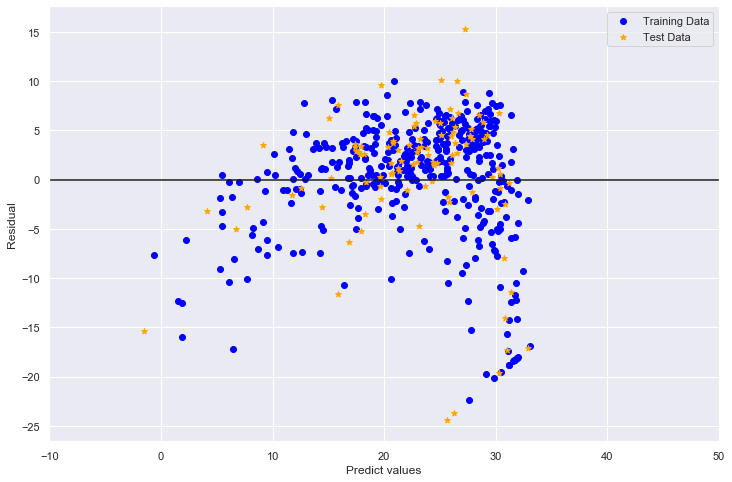

In [49]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, color='blue', marker='o', label='Training Data')
plt.scatter(y_test_pred, y_test_pred - y_test, color='orange', marker='*', label='Test Data')
plt.xlabel('Predict values')
plt.ylabel('Residual')
plt.legend(loc='upper right')
plt.hlines(y=0, xmin=-10, xmax=50, color='k')
plt.xlim([-10, 50])
plt.show()


### Method 2: Mean Squared Error (MSE)
\begin{align}
MSE = \frac{1}{n}  \sum_{i=1}^n(y_i-\hat{y}_i)^2
\end{align}

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
mean_squared_error(y_train, y_train_pred)

36.523966406959666

In [52]:
mean_squared_error(y_test, y_test_pred)

46.33630536002592

### Method 3: Coefficient of Determination, 
### $R^2$
\begin{align}
R^2 = 1 - \frac{SSE}{SST}
\end{align}
SSE: Sum of Squared Error <br>
SST: Sum of Squared Total

In [53]:
from sklearn.metrics import r2_score

In [54]:
r2_score(y_train, y_train_pred)

0.571031588576562

In [55]:
r2_score(y_test, y_test_pred)

0.43095672846187616